In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [6]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [7]:
L.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = L.predict(X_test)

In [9]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score : ", r2_score(y_test,y_pred))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score :  0.5188118914964637
Root Mean Squared Error :  48.72710829141399


In [10]:
## Let's do with Ridge regression

from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [11]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [12]:
y_pred1 = R.predict(X_test)

In [13]:
print("r2 score : ",r2_score(y_test,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score :  0.5188118914964637
RMSE :  48.72710829141399


In [14]:
# Ridge performing slightly well than linear regression.

## Ridge on different data.

In [15]:
from sklearn.datasets import make_regression

In [16]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

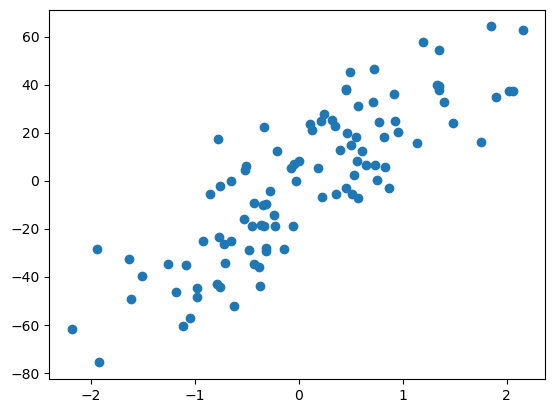

In [17]:
plt.scatter(X,y)

In [18]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

-2.29474455867698
[27.82809103]


In [19]:
from sklearn.linear_model import Ridge

In [20]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.intercept_)
print(rr.coef_)

-2.1269130035235726
[24.9546267]


In [21]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


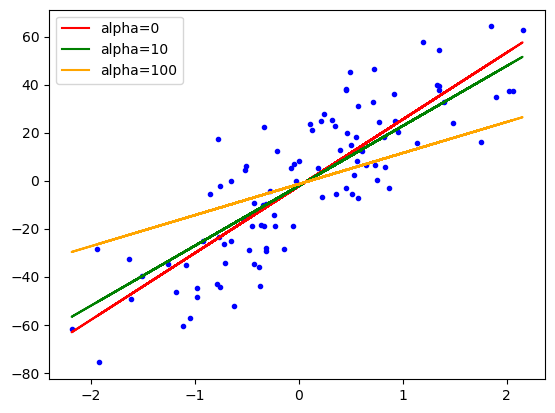

In [22]:
plt.plot(X,y,"b.")
plt.plot(X,lr.predict(X),color='red',label="alpha=0")
plt.plot(X,rr.predict(X),color='green',label="alpha=10")
plt.plot(X,rr1.predict(X),color='orange',label="alpha=100")
plt.legend()
plt.show()

In [23]:
def linear_regression(X,y,alpha=1):
    X_mean = X.mean()
    y_mean = y.mean()
    
    num = 0
    den = 0
    
    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean)*(x[i] - x_mean)
        den = den + ((x[i] - x_mean)*(x[i] - x_mean))
        
    m = num/(den + alpha)
    b = y_mean - (m*X_mean)
        
    return m,b    

In [24]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass

In [25]:
reg = MeraRidge(alpha=100)
reg.fit(X,y)

[12.93442104] [-1.42484415]


In [26]:
# our class and inbuilt class performing same.

## Lasso 

In [28]:
from sklearn.linear_model import Lasso

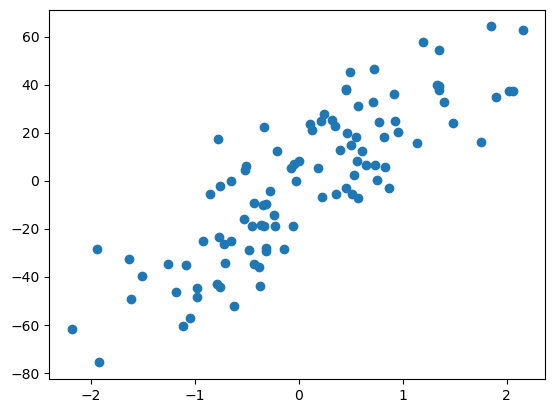

In [31]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

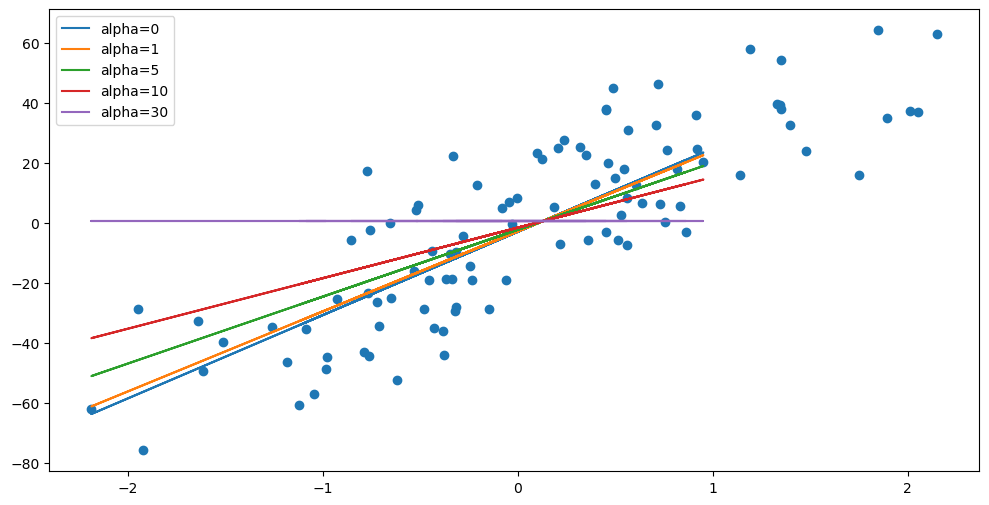

In [32]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

In [34]:
# In case of lasso if we increase the value of alpha the coef move towards zero and at perticular instance it will be zero

## ElasticNet

In [36]:
from sklearn.linear_model import ElasticNet

In [37]:
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.6212357741041206